In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sal=pd.concat([pd.read_csv(f"salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
sal=sal.groupby("name").first()
sal.head(50)

,title,salary,benefits
name,,,
A. Tupling,Professor,180567.92,519.72
A.Russell Tupling,Professor,166933.16,578.96
Abigail Scholer,Associate Professor,132597.73,373.00
Achim Kempf,Professor,187834.44,395.88
Ada Barlatt,Assistant Professor,102159.48,359.08
Ada Hurst,Lecturer,128921.00,380.48
Adam Kolkiewicz,Associate Professor,175958.20,519.36
Adam Neale,Lecturer,102058.60,169.28
Adam Tsen,Assistant Professor,128595.20,147.44


In [7]:
df=pd.read_csv("averages2.csv").drop("enrolled",axis=1)
df[["term"]]=pd.Categorical(df.term)
df.head()

,term,ccode,section,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses
0,1131,ACTSC 231,1,Anne Mackay,1.600000,2.873239,1.536232,1.591549,1.676056,1.526316,1.776119,1.647887,1.225352,1.588235,1.358209,2.036364,2.782609,2.901639,2.279412,71
1,1131,ACTSC 231,51,Carole Bernard,1.727273,2.909091,2.090909,1.700000,2.000000,1.444444,1.700000,1.818182,1.000000,1.300000,1.625000,1.333333,2.545455,2.818182,2.000000,11
2,1131,ACTSC 232,1,James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,1.641304,1.391753,1.154639,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97
3,1131,ACTSC 331,1,Rocky Cui,1.851064,2.744681,2.043478,1.978723,2.108696,1.515152,1.866667,1.936170,1.297872,1.500000,1.586207,1.878049,2.659574,2.755556,2.021277,47
4,1131,ACTSC 371,1,Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,2.070588,2.333333,1.329787,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95


In [8]:
df["ccode"]=df["ccode"].str.split(" / ")

In [9]:
import os
df2 = pd.concat((pd.read_csv(f"catalog/{f}", dtype={"enrolled": int}) for f in os.listdir("catalog")))


In [49]:
df[["term"]]

,term
0,1131
1,1131
2,1131
3,1131
4,1131
...,...
3783,1185
3784,1185
3785,1185
3786,1185


In [17]:
# df['key'] = (df.ccode != df.ccode.shift()).cumsum()

In [42]:
# df=df.drop('key',axis=1)
df1=df.explode("ccode")
df1['copy_index'] = df1.index
df1

,term,ccode,section,instructor,organization,expl_lvl,q_treatment,visual,oral,help,...,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,copy_index
0,1131,ACTSC 231,1,Anne Mackay,1.600000,2.873239,1.536232,1.591549,1.676056,1.526316,...,1.647887,1.225352,1.588235,1.358209,2.036364,2.782609,2.901639,2.279412,71,0
1,1131,ACTSC 231,51,Carole Bernard,1.727273,2.909091,2.090909,1.700000,2.000000,1.444444,...,1.818182,1.000000,1.300000,1.625000,1.333333,2.545455,2.818182,2.000000,11,1
2,1131,ACTSC 232,1,James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,...,1.391753,1.154639,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97,2
3,1131,ACTSC 331,1,Rocky Cui,1.851064,2.744681,2.043478,1.978723,2.108696,1.515152,...,1.936170,1.297872,1.500000,1.586207,1.878049,2.659574,2.755556,2.021277,47,3
4,1131,ACTSC 371,1,Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,...,2.333333,1.329787,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,1185,CM 761,1,Ryan Browne,2.200000,2.933333,2.066667,2.357143,2.266667,1.500000,...,2.333333,1.533333,1.600000,1.636364,1.000000,2.733333,2.666667,3.066667,15,3785
3785,1185,STAT 440,1,Ryan Browne,2.200000,2.933333,2.066667,2.357143,2.266667,1.500000,...,2.333333,1.533333,1.600000,1.636364,1.000000,2.733333,2.666667,3.066667,15,3785
3785,1185,STAT 840,1,Ryan Browne,2.200000,2.933333,2.066667,2.357143,2.266667,1.500000,...,2.333333,1.533333,1.600000,1.636364,1.000000,2.733333,2.666667,3.066667,15,3785
3786,1185,STAT 443,1,Hamy Fahmy,3.088235,3.000000,3.090909,3.323529,2.941176,3.076923,...,3.029412,1.794118,1.941176,2.055556,2.000000,2.424242,2.558824,2.647059,34,3786


In [53]:
df1=df1.merge(df2,how="left").groupby("copy_index").agg({'enrolled': sum})

In [57]:
df1.index.is_monotonic

True

In [62]:
df["enrolled"]=df1.enrolled.astype(int)

In [65]:
df

,term,ccode,section,instructor,organization,expl_lvl,q_treatment,visual,oral,help,...,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled
0,1131,[ACTSC 231],1,Anne Mackay,1.600000,2.873239,1.536232,1.591549,1.676056,1.526316,...,1.647887,1.225352,1.588235,1.358209,2.036364,2.782609,2.901639,2.279412,71,184
1,1131,[ACTSC 231],51,Carole Bernard,1.727273,2.909091,2.090909,1.700000,2.000000,1.444444,...,1.818182,1.000000,1.300000,1.625000,1.333333,2.545455,2.818182,2.000000,11,18
2,1131,[ACTSC 232],1,James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,...,1.391753,1.154639,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97,143
3,1131,[ACTSC 331],1,Rocky Cui,1.851064,2.744681,2.043478,1.978723,2.108696,1.515152,...,1.936170,1.297872,1.500000,1.586207,1.878049,2.659574,2.755556,2.021277,47,95
4,1131,[ACTSC 371],1,Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,...,2.333333,1.329787,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,1185,"[STAT 430, STAT 830]",1,Fernando Camacho,3.081081,2.937500,2.441176,3.351351,3.055556,2.400000,...,3.054054,1.472222,2.108108,2.000000,1.666667,2.363636,3.171429,2.270270,37,105
3784,1185,[STAT 431],1,Leilei Zeng,2.135135,2.729730,2.000000,1.945946,2.162162,1.733333,...,2.162162,1.216216,1.638889,1.821429,1.950000,2.888889,2.756757,2.540541,37,117
3785,1185,"[CM 761, STAT 440, STAT 840]",1,Ryan Browne,2.200000,2.933333,2.066667,2.357143,2.266667,1.500000,...,2.333333,1.533333,1.600000,1.636364,1.000000,2.733333,2.666667,3.066667,15,40
3786,1185,[STAT 443],1,Hamy Fahmy,3.088235,3.000000,3.090909,3.323529,2.941176,3.076923,...,3.029412,1.794118,1.941176,2.055556,2.000000,2.424242,2.558824,2.647059,34,128


In [68]:
df[df.isna().any(axis=1)]

,term,ccode,section,instructor,organization,expl_lvl,q_treatment,visual,oral,help,...,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled


In [27]:
df1.groupby('key').agg({'ccode': list, 'enrolled': sum}).reset_index(drop=True)

,ccode,enrolled
0,"[ACTSC 231, ACTSC 231]",202
1,[ACTSC 232],143
2,[ACTSC 331],95
3,"[ACTSC 371, ACTSC 371]",253
4,[ACTSC 372],174
...,...,...
2971,"[STAT 430, STAT 830]",105
2972,[STAT 431],117
2973,"[CM 761, STAT 440, STAT 840]",40
2974,[STAT 443],128


In [15]:
pd.merge(df, df2 ,how="left", on=["term","ccode","section"])


TypeError: unhashable type: 'list'

In [304]:
df1=df[df.num_responses>10] # only surveys with >10 responses
df1=df1.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
df1=pd.merge(df1,sal,how='left', left_on=["instructor"],right_on=['name']).drop(['benefits'],axis=1)
df1.head()

,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,...,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,term,title,salary
0,ACTSC 232,James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,1.641304,1.391753,...,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97,1131,Lecturer,136295.28
1,ACTSC 371,Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,2.070588,2.333333,...,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95,1131,Lecturer,128478.60
2,ACTSC 372,Peter Wood,1.435644,2.623762,1.400000,1.574257,1.386139,1.712121,1.590000,1.455446,...,1.666667,1.785714,2.103896,2.762376,2.891089,1.930000,101,1131,Lecturer,162561.88
3,ACTSC 433 / ACTSC 833,Jun Cai,1.723077,2.859375,2.262295,1.923077,2.476923,2.352941,1.833333,1.984375,...,1.415385,1.578947,2.166667,2.907692,2.707692,1.968750,65,1131,Professor,161277.18
4,ACTSC 446 / ACTSC 846,Ruodo Wang,2.308411,2.557692,1.990566,2.644860,2.679245,2.000000,2.031250,2.262136,...,1.775701,1.819444,2.370968,2.538462,2.844660,2.038095,107,1131,Associate Professor,141182.60


In [306]:
df1.describe()

,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,salary
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,2197.000000
mean,1.818678,2.811854,1.710346,1.925701,1.838593,1.854170,1.801829,1.784624,1.421841,1.630494,1.712246,1.892259,2.720941,2.746512,2.501956,44.758974,152660.204729
std,0.517105,0.201306,0.422051,0.498676,0.556056,0.430123,0.296774,0.522716,0.315548,0.234056,0.286208,0.352299,0.230634,0.280935,0.528582,27.004024,32401.015244
min,1.000000,1.615385,1.000000,1.055556,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.615385,1.402778,1.000000,11.000000,101601.080000
25%,1.429928,2.705882,1.411765,1.551474,1.422729,1.550765,1.597015,1.387097,1.205128,1.470588,1.521513,1.666667,2.583022,2.586769,2.142857,26.000000,127862.980000
50%,1.725541,2.823529,1.615385,1.837669,1.714286,1.809524,1.786950,1.675676,1.347382,1.604167,1.689655,1.890390,2.740741,2.788170,2.414864,39.000000,141315.160000
75%,2.075835,2.933333,1.920088,2.200000,2.100000,2.111111,2.000000,2.031634,1.555556,1.769231,1.879091,2.115385,2.875000,2.937500,2.764706,57.000000,176320.480000
max,4.368421,3.866667,4.000000,3.916667,4.300000,4.333333,2.934783,4.333333,3.416667,2.642857,3.000000,3.000000,3.869565,3.923077,5.000000,242.000000,242904.120000


In [310]:
# most prolific profs
df1.groupby("instructor").size().sort_values(ascending=False).head(20)

instructor
Victoria Sakhnini       38
Mark Petrick            38
Mukto Akash             33
Nomair Naeem            33
Brad Lushman            33
Hamy Fahmy              33
Collin Roberts          29
Joe West                29
Dave Tompkins           28
Michael Liu             28
Rosina Kharal Kharal    28
James Adcock            27
Lori Case               26
Riley Metzger           26
Dina Dawoud             26
Keith Freeland          25
Dan Wolczuk             25
Dan Holtby              25
Brent Matheson          24
Kevin Lanctot           24
dtype: int64

In [311]:
df1.groupby("instructor").get_group("David Toman").groupby("ccode").overall.mean().dropna()

ccode
CS 245    3.700000
CS 338    2.715878
CS 348    3.869979
Name: overall, dtype: float64

In [312]:
def top(df1,col,n=10,asc=True):
    return df1.groupby("instructor")[[col]].mean().sort_values(ascending=asc,by=col).head(n)

In [313]:
top(df1,"organization",asc=False)

,organization
instructor,
David Toman,3.568939
Iakov Nekrich,3.402525
Daniela Maftuleac,3.370017
Jonathan Buss,3.369061
Steven Gindi,3.262924
Edward Chan,3.178010
Ian Davis,3.077991
Ahmad Alrefai,3.056345
Grant Weddell,2.994952


In [314]:
# high overall rating profs
top(df1,"overall",asc=True)

,overall
instructor,
Mike Eden,1.119274
Ryan Trelford,1.142239
Brian Forrest,1.162014
Johnny Li,1.188889
Edward Dupont,1.191477
Yu-Ru Liu,1.196314
Ian Goldberg,1.197750
Pengfei Li,1.204525
Serge D'Alessio,1.207769


In [315]:
top(df1,"attendance",asc=True)

,attendance
instructor,
Paulo Alencar,1.059351
Mark Arnason,1.071543
Doug Andrews,1.074359
Gladimir Baranoski,1.100677
Jack Robinson,1.112824
Brian Forrest,1.117745
Jason Bell,1.119253
J Ian Munro,1.126888
Mary Hardy,1.142786


In [332]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split

# feats=["help","interesting","visual","oral","q_treatment","expl_lvl","assign_helpful"]
feats=list(df1.select_dtypes('number').columns)
feats.remove("salary")
feats.remove("num_responses")
x1,x2,y1,y2=train_test_split(df1[feats],df1.overall,random_state=42)
lr=LinearRegression()
lr=LassoCV(cv=5)
lr.fit(x1,y1)
print(f"train error: {np.mean(np.square(lr.predict(x1)-y1))}")
print(f"test error:  {np.mean(np.square(lr.predict(x2)-y2))}")

train error: 3.104167081679015e-07
test error:  2.8695660451938825e-07


In [333]:
from sklearn.metrics import r2_score
r2_score(lr.predict(x2),y2)

0.9999988686940563

In [317]:
for feat,coef in zip(feats,lr.coef_):
    print(feat,coef)

organization 0.0
expl_lvl -0.0
q_treatment 0.0
visual 0.0
oral 0.0009490790396458232
help 0.0
interesting 0.0
overall 0.998039739771341
attendance 0.0
assign_helpful 0.0
printed_notes 0.0
textbook 0.0
new_material -0.0
assign_amount 0.0
hours_outside -0.0


In [318]:
lr.alpha_

0.000281058424950599

In [319]:
sal.describe()

,salary,benefits
count,1419.000000,1419.000000
mean,158889.691367,378.895680
std,37132.201944,854.365343
min,100035.300000,0.000000
25%,128256.100000,199.000000
50%,156740.360000,345.720000
75%,183077.140000,491.020000
max,322455.360000,31258.640000


In [320]:
df1[df1.title.isna()].groupby("instructor").mean().sort_values("overall").head(33)

,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,salary
instructor,,,,,,,,,,,,,,,,,
Ryan Trelford,1.159747,2.765813,1.181136,1.217932,1.154595,1.256128,1.555816,1.142239,1.237763,1.508855,1.406723,1.679158,2.400236,2.601578,2.779316,43.000000,NaN
Jordan Hamilton,1.205309,2.810427,1.193231,1.395910,1.210453,1.369106,1.742762,1.211254,1.282635,1.482240,1.437989,1.946551,2.661122,2.783915,2.243658,114.692308,NaN
Blake Madill,1.362536,2.861062,1.281339,1.375356,1.299858,1.472607,1.577089,1.297009,1.286383,1.451314,1.414141,1.567100,2.730741,2.714387,2.521096,38.666667,NaN
Xi Gao,1.405605,3.000724,1.265964,1.237689,1.423090,1.317566,1.741096,1.300078,1.270837,1.501599,1.400257,1.925000,2.898341,2.356812,3.056526,46.000000,NaN
Michelle Ashburner,1.352341,2.936772,1.339254,1.397156,1.302948,1.565621,1.710420,1.322350,1.364317,1.641769,1.378909,1.786574,3.062861,2.919012,1.813426,91.909091,NaN
Nathaniel Stevens,1.392982,3.018791,1.451252,1.525975,1.455750,1.629014,2.252009,1.344208,1.707949,1.428430,1.352381,2.385560,2.947716,2.960547,1.701245,62.666667,NaN
Martin Pei,1.363186,2.773332,1.491348,1.363530,1.402100,1.613683,1.688403,1.353931,1.237403,1.513752,1.832320,1.951373,2.616814,2.730938,2.441874,61.500000,NaN
Nancy Day,1.388445,2.664815,1.343433,1.584272,1.360851,1.597300,1.752273,1.363416,1.310392,1.324877,1.563961,2.523433,2.535678,2.796675,2.260558,39.125000,NaN
Jeffrey Avery,1.500955,2.980170,1.420221,1.651006,1.316776,1.655202,1.615143,1.389347,1.515527,1.755089,1.830604,1.941667,2.779078,2.430139,3.323897,32.750000,NaN


In [322]:
# TENURE PREDICTOR!!!
dfp=df1
# dfp=df1[~df1.title.isna()]
dfp=dfp.groupby("instructor").mean()
dfp["num_taught"]=df1.groupby("instructor").size()
dfp["title"]=df1.groupby("instructor").first()[["title"]]
# dfp=dfp.reset_index()
feats=list(dfp.select_dtypes('number').columns)
feats.remove("salary")
has_tenure=dfp.title.isin(["Professor","Associate Professor"])

from sklearn.preprocessing import scale
x_s=dfp[feats].copy()
x_s[x_s.columns] = scale(x_s[x_s.columns])
x1,x2,y1,y2=train_test_split(x_s,has_tenure,test_size=.2,random_state=42)

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
# lr2=LinearRegression()
# lr2=LassoCV(cv=5)
lr2=LogisticRegressionCV(penalty="l1",cv=5,solver='liblinear',max_iter=999,random_state=42)#penalty="l2",C=100,solver='lbfgs',max_iter=999)
lr2.fit(x1,y1)
print(f"train error: {np.mean(lr2.predict(x1)!=y1)}")
print(f"test error:  {np.mean(lr2.predict(x2)!=y2)}")
print(f"baseline:    {np.mean(has_tenure)}")
# print(f"train error: {np.mean(np.square(lr2.predict(x1)-y1))}")
# print(f"test error:  {np.mean(np.square(lr2.predict(x2)-y2))}")

train error: 0.25622775800711745
test error:  0.28169014084507044
baseline:    0.42329545454545453


In [323]:
for feat,coef in sorted(zip(feats,lr2.coef_[0]),key=lambda x:-abs(x[1])):
    print(feat,-coef)

expl_lvl 0.7581498171297032
new_material -0.7360675051259545
interesting 0.4635305514716164
help -0.39640488283590875
num_responses 0.2960928656559802
num_taught 0.29165823510124633
printed_notes 0.22297260886260012
assign_amount -0.2200457096752074
attendance 0.20011242943918375
hours_outside -0.1378198863939056
oral -0.01755216173786558
organization -0.0
q_treatment -0.0
visual -0.0
overall -0.0
assign_helpful -0.0
textbook -0.0


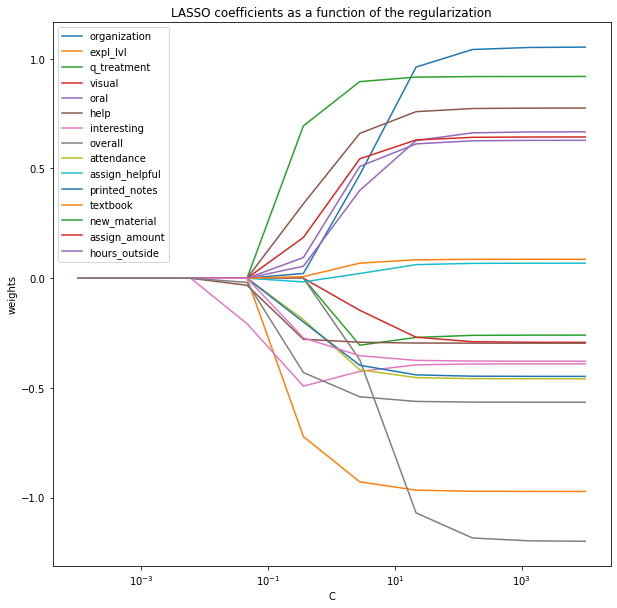

In [344]:
# #############################################################################
# Display results

plt.figure(figsize=(10,10))
ax = plt.gca()

ax.plot(lr2.Cs_, np.mean(lr2.coefs_paths_[True],axis=0))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('C')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(feats)
plt.show()